# Obter o dataset

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("./dataset.csv", sep=";") # ter em atenção o caminho do ficheiro
dataset.head()

,id,antecedencia_da_reserva,mes_chegada,dia_chegada,noites_da_estadia,noites_fim_de_semana,hotel_de_praia,regime,adultos,criancas,bebes,ja_cliente,cancelamentos_anteriores,reservas_anteriores_nao_canceladas,alteracoes_da_reserva,total_de_pedidos,tipo_deposito,cancelada
0,1,26,November,25,7,2,yes,HB - Half Board,3,0,0,no,0,0,0,2,No Deposit,no
1,2,31,June,1,2,0,no,BB - Bed & Breakfast,2,0,0,no,0,0,0,0,Non Refund,yes
2,5,4,March,17,3,0,no,BB - Bed & Breakfast,2,0,0,no,0,0,0,0,No Deposit,yes
3,8,6,December,1,1,0,yes,BB - Bed & Breakfast,1,0,0,no,0,0,0,2,No Deposit,no
4,12,65,March,12,4,2,no,BB - Bed & Breakfast,2,0,0,no,0,0,0,0,No Deposit,yes


#### Verificar Correlação das colunas

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

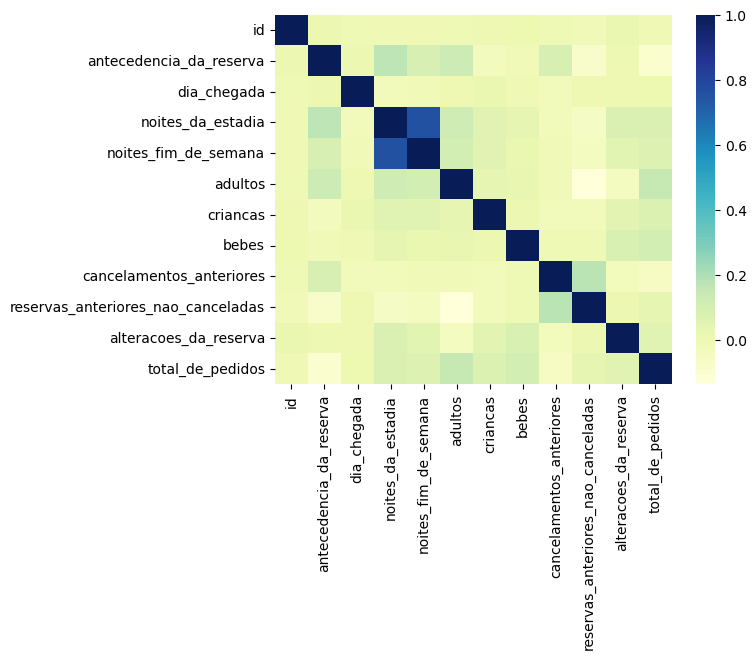

In [4]:
sns.heatmap(dataset.corr(), cmap="YlGnBu")
plt.show()

#### Verificar estatísticas do dataframe

In [5]:
dataset.describe()

,id,antecedencia_da_reserva,dia_chegada,noites_da_estadia,noites_fim_de_semana,adultos,criancas,bebes,cancelamentos_anteriores,reservas_anteriores_nao_canceladas,alteracoes_da_reserva,total_de_pedidos
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39143.443350,104.325000,15.87400,3.418900,0.92745,1.860500,0.104750,0.007750,0.078550,0.131000,0.219450,0.575700
std,22668.495051,106.236841,8.79385,2.511342,0.99022,0.483375,0.401355,0.088828,0.706544,1.335151,0.623547,0.791897
min,1.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19515.500000,19.000000,8.00000,2.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39041.000000,69.000000,16.00000,3.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58812.500000,160.000000,24.00000,4.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,78556.000000,630.000000,31.00000,31.000000,9.00000,5.000000,3.000000,2.000000,27.000000,64.000000,13.000000,6.000000


# Manipular dados

### alterar valores como "yes" e "no" para 0's e 1's:

In [6]:
dataset.hotel_de_praia = dataset.hotel_de_praia.map({
    "yes": 1,
    "no": 0
})


In [7]:
dataset.ja_cliente = dataset.ja_cliente.map({
    "yes": 1,
    "no": 0
})



In [8]:
dataset.cancelada = dataset.cancelada.map({
    "yes": 1,
    "no": 0
})

In [9]:
dataset.head()

,id,antecedencia_da_reserva,mes_chegada,dia_chegada,noites_da_estadia,noites_fim_de_semana,hotel_de_praia,regime,adultos,criancas,bebes,ja_cliente,cancelamentos_anteriores,reservas_anteriores_nao_canceladas,alteracoes_da_reserva,total_de_pedidos,tipo_deposito,cancelada
0,1,26,November,25,7,2,1,HB - Half Board,3,0,0,0,0,0,0,2,No Deposit,0
1,2,31,June,1,2,0,0,BB - Bed & Breakfast,2,0,0,0,0,0,0,0,Non Refund,1
2,5,4,March,17,3,0,0,BB - Bed & Breakfast,2,0,0,0,0,0,0,0,No Deposit,1
3,8,6,December,1,1,0,1,BB - Bed & Breakfast,1,0,0,0,0,0,0,2,No Deposit,0
4,12,65,March,12,4,2,0,BB - Bed & Breakfast,2,0,0,0,0,0,0,0,No Deposit,1


### Processo de One-Hot Encoding

In [10]:
ntipo_deposito = pd.get_dummies(dataset[["tipo_deposito"]], drop_first=True)

In [11]:
nregime = pd.get_dummies(dataset[["regime"]], drop_first=True)

In [12]:
nmes_chegada = pd.get_dummies(dataset[["mes_chegada"]], drop_first=True)

##### Concatenar novos dados ao dataframe e remover colunas irrelevantes

In [13]:
newdframe = pd.concat([dataset, ntipo_deposito, nregime, nmes_chegada], axis=1)

In [14]:
newdframe.corr().cancelada.abs().sort_values()

mes_chegada_July                      0.000011
mes_chegada_October                   0.000179
mes_chegada_December                  0.001107
noites_fim_de_semana                  0.001624
id                                    0.002196
mes_chegada_August                    0.006742
dia_chegada                           0.008449
regime_SC - Self Catering             0.008678
criancas                              0.010111
mes_chegada_May                       0.011610
mes_chegada_March                     0.013515
tipo_deposito_Refundable              0.017028
mes_chegada_September                 0.018474
mes_chegada_June                      0.020453
noites_da_estadia                     0.021479
mes_chegada_February                  0.021979
regime_HB - Half Board                0.026456
mes_chegada_November                  0.026946
mes_chegada_January                   0.031887
bebes                                 0.032400
regime_FB - Full Board                0.038484
adultos      

In [15]:
columns = [
    "id",
    "tipo_deposito",
    "regime",
    "mes_chegada"
]
newdframe.drop(columns = columns, inplace = True)

In [16]:
newdframe.head()

,antecedencia_da_reserva,dia_chegada,noites_da_estadia,noites_fim_de_semana,hotel_de_praia,adultos,criancas,bebes,ja_cliente,cancelamentos_anteriores,...,mes_chegada_December,mes_chegada_February,mes_chegada_January,mes_chegada_July,mes_chegada_June,mes_chegada_March,mes_chegada_May,mes_chegada_November,mes_chegada_October,mes_chegada_September
0,26,25,7,2,1,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,31,1,2,0,0,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4,17,3,0,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6,1,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,65,12,4,2,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Dividir dataset em variáveis de teste e treino

In [17]:
X = newdframe.drop('cancelada', axis=1)
y = newdframe['cancelada']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.20, 
    random_state=1, 
    stratify=X[["tipo_deposito_Non Refund"]] # uxamos esta coluna porque foi a coluna mais relevante obtida na correlação acima
)

# Criação do primeiro Modelo SVC

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix, classification_report
modelo1 = SVC()

In [20]:
modelo1.fit(X_train, y_train)

SVC()

In [21]:
modelo1.score(X_test, y_test)

0.672

In [22]:
predicts = modelo1.predict(X_test)

In [23]:
f1_score(y_test, predicts)

0.3472636815920398

In [24]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78      2559
           1       0.61      0.24      0.35      1441

    accuracy                           0.67      4000
   macro avg       0.65      0.58      0.56      4000
weighted avg       0.66      0.67      0.62      4000



In [25]:
print(confusion_matrix(y_test, predicts))

[[2339  220]
 [1092  349]]


# Normalizar os dados

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
scaler.fit(X_train)

StandardScaler()

In [28]:
X_treino_norm = scaler.transform(X_train)
X_teste_norm = scaler.transform(X_test)

In [29]:
svclassifier = SVC()


In [30]:
svclassifier.fit(X_treino_norm, y_train)

SVC()

In [31]:
predicts = svclassifier.predict(X_teste_norm)

In [32]:
svclassifier.score(X_teste_norm, y_test)

0.79425

In [33]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      2559
           1       0.94      0.46      0.62      1441

    accuracy                           0.79      4000
   macro avg       0.85      0.72      0.74      4000
weighted avg       0.83      0.79      0.77      4000



In [34]:
f1_score(y_test, predicts)

0.6170311772917636

In [35]:
print(confusion_matrix(y_test, predicts))

[[2514   45]
 [ 778  663]]


# Tunning do Modelo

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grelha_parametros = {
    'C': [13, 1 , 10],
    'kernel':["rbf"]
} # não podemos adicionar muitos valores senão o modelo demora muito a treinar

In [38]:
modelo1 = SVC()

In [39]:
procura_modelo = GridSearchCV(modelo1, param_grid=grelha_parametros)

In [40]:
procura_modelo.fit(X_treino_norm, y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [13, 1, 10], 'kernel': ['rbf']})

In [41]:
melhor_modelo = procura_modelo.best_estimator_

In [ ]:
melhor_modelo.score(X_teste_norm, y_test)

In [ ]:
predicts = melhor_modelo.predict(X_teste_norm)

In [ ]:
print(classification_report(y_test, predicts))

In [ ]:
f1_score(y_test, predicts)

In [ ]:
print(confusion_matrix(y_test, predicts))

# Construir csv com os resultados alcançados

In [ ]:
dataset_nao_classificado = pd.read_csv("../dataset_naoclassificado.csv", sep=";")
dfnc = dataset_nao_classificado.copy()
dataset_nao_classificado

#### formatar devidamente o dataframe para fazer as predicts

In [ ]:
dfnc.hotel_de_praia = dfnc.hotel_de_praia.map({
    "yes": 1,
    "no": 0
})

In [ ]:
dfnc.ja_cliente = dfnc.ja_cliente.map({
    "yes": 1,
    "no": 0
})

In [ ]:
ntipo_deposito = pd.get_dummies(dfnc[["tipo_deposito"]], drop_first=True)

In [ ]:
nregime = pd.get_dummies(dfnc[["regime"]], drop_first=True)

In [ ]:
nmes_chegada = pd.get_dummies(dfnc[["mes_chegada"]], drop_first=True)

In [ ]:
newdframe_nc = pd.concat([dfnc, ntipo_deposito, nregime, nmes_chegada], axis=1)

In [ ]:
newdframe_nc.drop(columns = columns, inplace = True)

In [ ]:
newdframe_nc

In [ ]:
X_data_norm = scaler.transform(newdframe_nc)

## Obter as predicts do dataframe

In [ ]:
final_predicts = melhor_modelo.predict(X_data_norm)
len(final_predicts)

#### passar predicts para o dataset

In [ ]:
dataset_nao_classificado.insert(column="cancelada", value=final_predicts, loc=1)

### exportar dataset estimado de acordo com o enunciado

In [ ]:
dataset_nao_classificado.to_csv("./classificacao_estimada.csv", columns=["id", "cancelada"], sep=";", index=False)